In [146]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import networkx as nx

from netgraph import ArcDiagram

In [2]:
data = pd.read_csv("data\\cats_uk.csv")
meta = pd.read_csv("data\\cats_uk_reference.csv")

In [137]:
#exclude outliers
data = data[data["manually_marked_outlier"]==False]
data = data[data["algorithm_marked_outlier"]==False]

# Calculate perimeter based on area covered
poly = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data["location_long"], data["location_lat"]))
poly = poly.dissolve("tag_id").convex_hull

gdf = gpd.GeoDataFrame(poly, geometry = poly.geometry, crs = "EPSG:4326").reset_index().drop(columns=0)
gdf = gdf.to_crs(3035)
gdf["area"] = gdf.area
gdf["perimeter"] = gdf.length

#join meta data
gdf = pd.merge(gdf, meta, left_on="tag_id", right_on="tag_id")

# Plot

In [260]:
import numpy as np
from matplotlib import patches

Calculate the arcs - source [code](https://stackoverflow.com/questions/54507499/i-am-trying-to-make-a-arc-diagram-using-python-but-i-am-not-able-to-get-the-heig).

Also found [this repository](vhttps://github.com/paulbrodersen/network_line_graph)

In [318]:
# calculate the arc

def calculate_arc(x1, x2, y1, y2, var):
    mxmy = mx, my = [(x1 + x2) / 2, (y1 + y2) / 2]
    r = np.sqrt((x1 - mx)**2 + (y1 - my)**2)
    width = 2 * r
    height = 2.5 /  var.max()  * r
    start_angle = np.arctan2(y1 - my, x1 - mx) * 180 / np.pi
    end_angle = np.arctan2(my - y2, mx - x2) * 180 / np.pi
    return mxmy, width, height, start_angle, end_angle

In [433]:
#colour palette
import matplotlib as mpl
import matplotlib.cm as cm
from palettable.scientific.sequential import Buda_7_r
from palettable.cmocean.sequential import Deep_8, Dense_10, Haline_10_r, Matter_8, Tempo_8_r, Matter_8_r

cmap = Matter_8.mpl_colormap
norm = mpl.colors.Normalize(vmin=0, vmax=gdf["age_years"].max()+4)
m = cm.ScalarMappable(norm=norm, cmap=cmap)

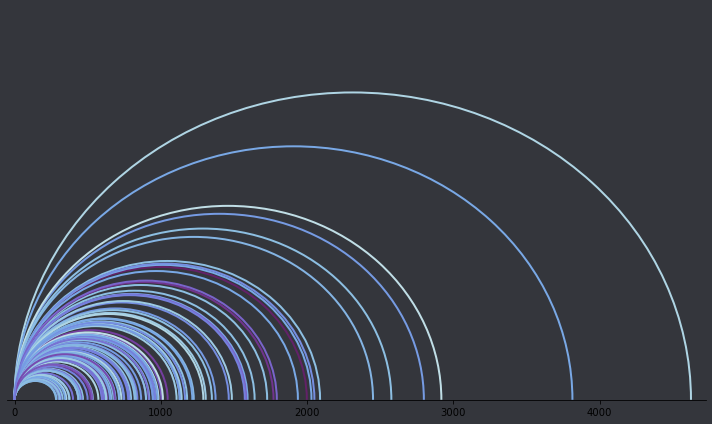

In [448]:
var = gdf["perimeter"]

cmap = Dense_10.mpl_colormap
norm = mpl.colors.Normalize(vmin=-2, vmax=gdf["age_years"].max()+4)
m = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots(figsize = (10,6), layout="tight")
bg = "#34363c"
fig.set_facecolor(bg)
#plot arcs
for i, perimeter in enumerate(var):
    x1, y1 = (0., 0.)
    x2, y2 = (perimeter, 0.)
    mxmy, width, height,start_angle, end_angle = calculate_arc(x1, x2, y1, y2, var)  
    arc = patches.Arc(mxmy, width, height, start_angle, end_angle, 
                      color=m.to_rgba(gdf["age_years"][i])
                      , linewidth=2
                     #,linewidth=gdf["age_years"][i]/6
                     )
    ax.add_patch(arc)
    
#plot nodes
#ax.scatter(y = np.ones(len(var))*0, x=var, s=30, color="black", alpha=0.5) 

ax.set_xlim(-50, var.max()+100) 
ax.set_xticks([0,1000, 2000, 3000, 4000])
ax.set_ylim(-0., 0.8)
for pos in ["top", "left", "right"]:
    ax.spines[pos].set_visible(False)
ax.set_yticks([])
ax.set_facecolor(bg)

plt.show()

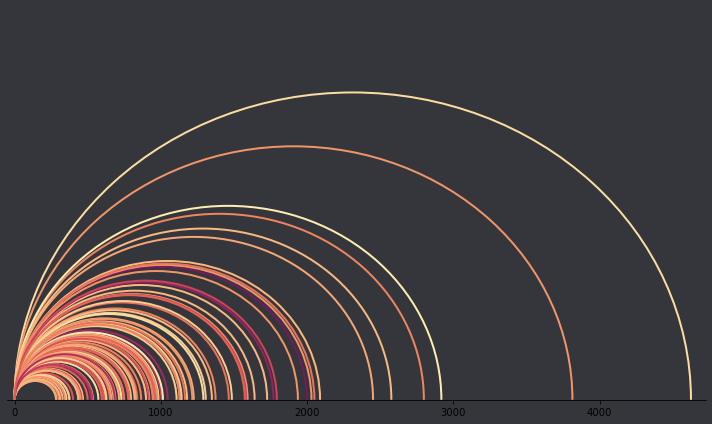

In [444]:
var = gdf["perimeter"]

cmap = Matter_8.mpl_colormap
norm = mpl.colors.Normalize(vmin=0, vmax=gdf["age_years"].max()+4)
m = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots(figsize = (10,6), layout="tight")
bg = "#34363c"
fig.set_facecolor(bg)
#plot arcs
for i, perimeter in enumerate(var):
    x1, y1 = (0., 0.)
    x2, y2 = (perimeter, 0.)
    mxmy, width, height,start_angle, end_angle = calculate_arc(x1, x2, y1, y2, var)  
    arc = patches.Arc(mxmy, width, height, start_angle, end_angle, 
                      color=m.to_rgba(gdf["age_years"][i])
                      , linewidth=2
                     #,linewidth=gdf["age_years"][i]/6
                     )
    ax.add_patch(arc)
    
#plot nodes
#ax.scatter(y = np.ones(len(var))*0, x=var, s=30, color="black", alpha=0.5) 

ax.set_xlim(-50, var.max()+100) 
ax.set_xticks([0,1000, 2000, 3000, 4000])
ax.set_ylim(-0., 0.8)
for pos in ["top", "left", "right"]:
    ax.spines[pos].set_visible(False)
ax.set_yticks([])
ax.set_facecolor(bg)

plt.show()

In [312]:
gdf[gdf["perimeter"]==gdf["perimeter"].max()]

,tag_id,geometry,area,perimeter,animal_id,animal_taxon,deploy_on_date,deploy_off_date,hunt,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
25,Dexter2-Tag,"POLYGON ((3267428.771 3147866.016, 3267250.845...",426316.935766,4625.260722,Dexter2,Felis catus,2017-09-23T17:31:52Z,2017-09-29T05:09:59Z,False,0.0,Neutered,m,2.5,1,True,True,False,UK,1.0


# Code snippets

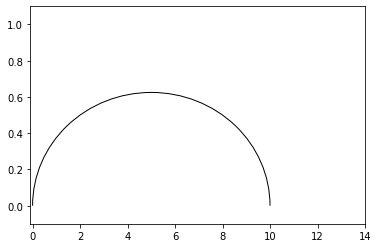

In [255]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import patches

# set the points
x1, y1 = (0., 0.)
x2, y2 = (10., 0.)

# calculate the arc
mxmy = mx, my = [(x1 + x2) / 2, (y1 + y2) / 2]
r = np.sqrt((x1 - mx)**2 + (y1 - my)**2)
width = 2 * r
height = 2.5/10 * r
start_angle = np.arctan2(y1 - my, x1 - mx) * 180 / np.pi
end_angle = np.arctan2(my - y2, mx - x2) * 180 / np.pi

# draw
arc = patches.Arc(mxmy, width, height, start_angle, end_angle)

fig, ax = plt.subplots(1,1)
ax.add_patch(arc)
ax.set_xlim(-0.1, x2+4) # you need to set the appropriate limits explicitly!
ax.set_ylim(-0.1, 1.1)
plt.show()

C:\Users\lisa.hornung\anaconda3\envs\py3_viz\lib\site-packages\netgraph\_node_layout.py:918: UserWarning: Maximum number of iterations reached. Aborting further node layout optimisations.
  warnings.warn("Maximum number of iterations reached. Aborting further node layout optimisations.")


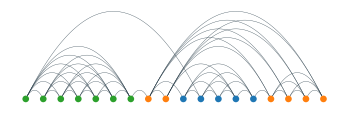

In [147]:
# Create a modular graph.
partition_sizes = [5, 6, 7]
g = nx.random_partition_graph(partition_sizes, 1, 0.1)

# Create a dictionary that maps nodes to the community they belong to,
# and set the node colors accordingly.
node_to_community = dict()
node = 0
for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1

community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

ArcDiagram(g, node_size=1, node_color=node_color, node_edge_width=0, edge_alpha=1., edge_width=0.1)
plt.show()

In [ ]:
xy, width, height, *, angle=0.0, theta1=0.0, theta2=360.0, **kwargs)

In [140]:
gdf[gdf["tag_id"]=="Mifty-Tag"]

,tag_id,geometry,area,perimeter,animal_id,animal_taxon,deploy_on_date,deploy_off_date,hunt,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
67,Mifty-Tag,"POLYGON ((3255342.478 3127118.259, 3255277.541...",89078.579143,1142.984263,Mifty,Felis catus,2017-07-13T01:01:00Z,2017-07-20T00:31:00Z,True,12.5,Spayed,f,7.5,1,True,True,False,UK,2.0


<BarContainer object of 101 artists>

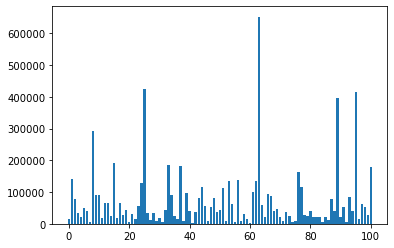

In [142]:
plt.bar(x = gdf.index, height=gdf["area"])

<AxesSubplot:>

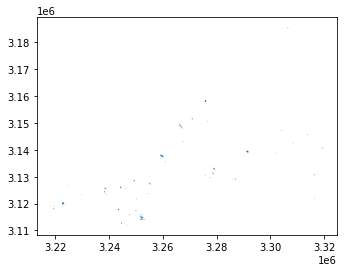

In [145]:
gdf.plot()